<a href="https://colab.research.google.com/github/jcbdoliveira/desafrio_de_projeto_unimed-bh_pandas/blob/main/Desafio_de_projeto_Unimed_BH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Olá, este projeto tem como objetivo explorar uma base de dados de vendas.
Os dados foram obitidos do site [Kaggle](https://www.kaggle.com/datasets). Este site prôve vários dataset de dados abertos que são uma ótima opção de treino e aperfeiçoamento de habilidades.
Neste projeto irei analisar as vendas de produtos, segmentando por clientes, grupos e categorias.

**Roteiro da análise:**

1.   Definir escopo, para saber as linhas e colunas
2.   Testar a base para encontar dados nulos e tratar se necessário
3.   Remover colunas desnecessárias
4.   Analisar campos chaves da tabela para evitar distorções e análise falha.
5.   Identificar o período de tempo para análise
6.   Responder as questões abaixo:
     *   Qual faturamento total
     *   Qual faturamento por ano
     *   Qual faturamento por: estado, cidade e região
     *   Qual custo de envio por tipo
     *   Prazo médio de envio
     *   Margem de contribuição de lucro por produto
     *   Top 10 produtos vendidos em quantidade e valor de venda



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv("sales.csv")


1.   Definir escopo, para saber as linhas e colunas

In [2]:
#Método utilizado para mostrar os primeiros registros da base
df.head()

,Unnamed: 0,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,...,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio
0,0,674,4706,2012-12-28,Não Especificada,30,2116.70,0.02,Aéreo Normal,488.818,...,Pernambuco,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Capas e Acessórios,Catalog Binders with Expanding Posts,Small Box,0.40,2012-12-30
1,1,816,5891,2012-12-28,Média,2,44.45,0.01,Aéreo Normal,-17.457,...,Paraíba,Nordeste,Brasil,Escritório em Casa,Material de Escritório,Capas e Acessórios,Avery Legal 4-Ring Binder,Small Box,0.35,2012-12-30
2,2,1876,13507,2012-12-29,Média,27,176.10,0.09,Aéreo Normal,-75.710,...,Pará,Norte,Brasil,Pequenas Empresas,Material de Escritório,Papel,Strathmore Photo Mount Cards,Small Box,0.39,2012-12-30
3,3,3583,25542,2012-12-30,Baixa,37,257.46,0.09,Aéreo Rápido,-18.660,...,Goiás,Centro-Oeste,Brasil,Escritório em Casa,Material de Escritório,Papel,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",Wrap Bag,0.39,2012-12-30
4,4,4008,28611,2012-12-27,Baixa,30,15337.58,0.10,Aéreo Normal,6670.409,...,São Paulo,Sudeste,Brasil,Consumidor,Material de Escritório,Capas e Acessórios,GBC DocuBind 300 Electric Binding Machine,Small Box,0.37,2012-12-30


In [3]:
#Utilizado para ler as quantidades de linhas e colunas
df.shape

(8399, 25)

In [4]:
#Apresenta uma lista dos campos 
df.dtypes

Unnamed: 0                    int64
Row ID                        int64
Order ID                      int64
Data da Venda                object
Prioridade                   object
Quantidade                    int64
Valor da Venda              float64
Desconto                    float64
Forma de Envio               object
Lucro                       float64
Preço Unitário              float64
Custo de Envio              float64
Nome do Cliente              object
Cidade                       object
CEP                           int64
Estado                       object
Região                       object
País                         object
Segmento do Cliente          object
Categoria do Produto         object
Sub-Categoria do Produto     object
Nome do Produto              object
Embalagem                    object
Margem                      float64
Data de Envio                object
dtype: object

2.  Testar a base para encontar dados nulos e tratar se necessário

In [5]:
#verificando valores nulos
df.isnull().sum()

Unnamed: 0                   0
Row ID                       0
Order ID                     0
Data da Venda                0
Prioridade                   0
Quantidade                   0
Valor da Venda               0
Desconto                     0
Forma de Envio               0
Lucro                        0
Preço Unitário               0
Custo de Envio               0
Nome do Cliente              0
Cidade                       0
CEP                          0
Estado                       0
Região                       0
País                         0
Segmento do Cliente          0
Categoria do Produto         0
Sub-Categoria do Produto     0
Nome do Produto              0
Embalagem                    0
Margem                      63
Data de Envio                0
dtype: int64

In [6]:
#Substituindo os valores nulos pela média
df["Margem"].fillna(df["Margem"].mean(), inplace=True)

3.   Remover colunas desnecessárias

In [7]:
#Removendo colunas não utilizdas na análise
colunas_par_remocao = ["Unnamed: 0","Row ID", "Order ID", "Prioridade"]
df = df.drop(columns=colunas_par_remocao)

4.   Analisar campos chaves da tabela para evitar distorções e análise falha.

In [8]:
#Validando as colunas "valora da Venda" e (quantidade * Preço unitário)"
#Se verdadeiro utilizamos coluna "valor da venda", caso contrário atualizamos os valores
if not (df["Valor da Venda"].sum() == (df["Quantidade"].mul(df["Preço Unitário"])).sum()):
  df["Valor da Venda"] = (df["Quantidade"] * df["Preço Unitário"])

In [9]:
#Analisando a coluna lucro
#A coluna "Margem" representa a margem de lucro  obtido na venda.
#Desta forma  podemos validar a coluna comparando com a coluna  "Valor da Venda" multiplicado pela caoluna "Margem"
#Se valores de amostra diferentes atualizamos o valor da coluna Lucro
(df["Lucro"] == df["Valor da Venda"].mul(df["Margem"])).sample(10)


7886    False
2393    False
7564    False
5467    False
6893    False
2931    False
8289    False
4334    False
6628    False
2603    False
dtype: bool

In [10]:
#O resultado foi que a coluna "Lucro" não representa o valor esperado.
#Vamos corrigir a coluna com valores novos
df["Lucro"] = (df["Valor da Venda"].mul(df["Margem"]))

In [11]:
#Refazendo análise da coluna "Lucro"
(df["Lucro"] == (df["Valor da Venda"] * df["Margem"])).sample(10)

3771    True
2291    True
1306    True
7761    True
3528    True
8371    True
2048    True
6799    True
5155    True
3596    True
dtype: bool

In [12]:
#Para finalizar o campo "Lucro" vamos decontar o "Custo de Envio"
df["Lucro"] = (df["Lucro"] - df["Custo de Envio"])

5.   Identificar o período de tempo para análise


In [13]:
df["Data da Venda"].min()

'2009-01-01'

In [14]:
df["Data da Venda"].max()

'2012-12-30'

In [15]:
#Convertendo o campo Data da Venda para datetime
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"], errors="ignore")

In [16]:
#Convertendo o campo Data da Envio para datetime
df["Data de Envio"] = pd.to_datetime(df["Data de Envio"], errors="ignore")

 *   Qual faturamento total

In [17]:
df["Valor da Venda"].sum()

15507174.95

*   Qual faturamento por ano

In [18]:
#Faturamento por ano
df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].sum()

Data da Venda
2009    4355149.59
2010    3685916.16
2011    3597484.15
2012    3868625.05
Name: Valor da Venda, dtype: float64

In [19]:
#Transações por ano
df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].count()

Data da Venda
2009    2153
2010    2142
2011    2002
2012    2102
Name: Valor da Venda, dtype: int64

In [20]:
#Valor médio por transação
(df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].sum() / df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].count())

Data da Venda
2009    2022.828421
2010    1720.782521
2011    1796.945130
2012    1840.449596
Name: Valor da Venda, dtype: float64

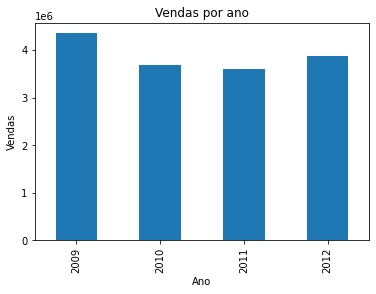

In [21]:
df.groupby(df["Data da Venda"].dt.year)['Valor da Venda'].sum().plot.bar(title='Vendas por ano')
plt.xlabel("Ano")
plt.ylabel("Vendas");

*   Qual faturamento por: estado, cidade e região

In [22]:
df.groupby(df["Estado"])['Valor da Venda'].sum().sort_values(ascending=False)

Estado
Goiás                  2952044.42
São Paulo              2230965.72
Pernambuco             1496889.09
Paraná                 1345470.09
Rio Grande do Sul      1251533.10
Mato Grosso do Sul      836205.92
Espírito Santo          705175.50
Santa Catarina          688143.60
Bahia                   650522.06
Mato Grosso             469240.80
Minas Gerais            372294.41
Piauí                   342277.94
Paraíba                 331935.71
Alagoas                 263751.21
Rio Grande do Norte     249471.83
Tocantins               242414.13
Rio de Janeiro          238693.80
Sergipe                 235666.48
Distrito Federal        194816.72
Maranhão                160593.90
Amazonas                107917.91
Pará                     87540.93
Ceará                    53609.68
Name: Valor da Venda, dtype: float64

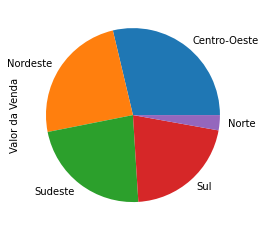

In [23]:
df.groupby(df["Região"])['Valor da Venda'].sum().sort_values(ascending=False).plot.pie();

In [24]:
df.groupby([df["Região"], df["Estado"], df["Cidade"]])['Valor da Venda'].sum()

Região        Estado               Cidade             
Centro-Oeste  Distrito Federal     Brasília                194816.72
              Goiás                Alexânia                128969.03
                                   Anápolis                997322.99
                                   Caldas Novas             26885.00
                                   Corumbá de Goiás        124119.04
                                   Formosa                 577161.49
                                   Goianésia               220740.27
                                   Goiânia                 651706.88
                                   Novo Gama               225139.72
              Mato Grosso          Cuiabá                  469240.80
              Mato Grosso do Sul   Campo Grande            486686.02
                                   Douradina               135905.51
                                   Eldorado                148626.95
                                   Fátima do Sul

*   Qual custo de envio por tipo

In [25]:
df.groupby(df["Forma de Envio"])['Custo de Envio'].sum()

Forma de Envio
Aéreo Normal             48008.19
Aéreo Rápido              7850.91
Transporte Rodoviário    51971.94
Name: Custo de Envio, dtype: float64

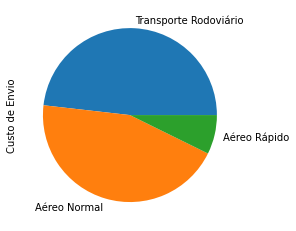

In [ ]:
df.groupby(df["Forma de Envio"])['Custo de Envio'].sum().sort_values(ascending=False).plot.pie();

*   Prazo médio de envio

In [26]:
#Calculando o tempo de envio em dias
df["Tempo médio envio"] = (df["Data de Envio"] - df["Data da Venda"]).dt.days

In [27]:
#Convertendo o campo Tempo médio para inteiro
df["Tempo médio envio"] = df["Tempo médio envio"].astype("int")

In [28]:
#Listando dados estatisticos do envio
print(f'Menor tempo de envio............: {df["Tempo médio envio"].min()}')
print(f'Maior tempo de envio............: {df["Tempo médio envio"].max()}')
print(f'Média tempo de envio............: {df["Tempo médio envio"].mean():.2f}')
print(f'Desvio padrão do tempo de envio.: {df["Tempo médio envio"].std():.2f}')

Menor tempo de envio............: 0
Maior tempo de envio............: 92
Média tempo de envio............: 2.03
Desvio padrão do tempo de envio.: 2.30


In [34]:
#Como o maior tempo de envio foi muito discrepante, apliquei filtro para mostrar apenas meno ou igual a cinco
df_clone = df.loc[(df["Tempo médio envio"] <= 5)]

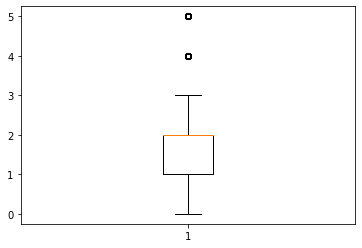

In [35]:
plt.boxplot(df_clone["Tempo médio envio"]);

In [40]:
#Lendo os registros com tempo médio maior que 5
df_clone = df.loc[(df["Tempo médio envio"] >= 5)]

In [43]:
df_clone.head()

,Data da Venda,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,Custo de Envio,Nome do Cliente,Cidade,...,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio,Tempo médio envio
18,2012-12-24,17,1121.83,0.04,Aéreo Normal,657.6797,65.99,4.20,Joy Daniels,Loanda,...,Sul,Brasil,Corporativo,Tecnologia,Telefones e Comunicação,5170,Small Box,0.59,2012-12-29,5
61,2012-12-09,39,112.71,0.05,Aéreo Normal,42.3298,2.89,0.50,Bobby Trafton,São Paulo,...,Sudeste,Brasil,Corporativo,Material de Escritório,Etiquetas,Avery 498,Small Box,0.38,2012-12-18,9
64,2012-12-11,41,1270.18,0.04,Aéreo Rápido,437.7548,30.98,19.51,Carol Darley,João Pessoa,...,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Envelopes,Staples Colored Interoffice Envelopes,Small Box,0.36,2012-12-18,7
72,2012-12-09,48,1983.36,0.01,Aéreo Normal,1498.6936,41.32,8.66,Bobby Trafton,Belo Horizonte,...,Sudeste,Brasil,Corporativo,Mobiliário,Mobiliário de Escritório,"Deflect-o EconoMat Studded, No Bevel Mat for L...",Medium Box,0.76,2012-12-16,7
82,2012-12-06,14,1113.28,0.08,Aéreo Normal,775.6272,79.52,48.20,Xylona Price,São Paulo,...,Sudeste,Brasil,Corporativo,Mobiliário,Mobiliário de Escritório,Eldon Cleatmat Plus™ Chair Mats for High Pile ...,Medium Box,0.74,2012-12-13,7


*   Margem de lucro por produto

In [66]:
#Clonando dataframe e agupando por Nome do Produto e somando os lucros
df_margem_lucro = df.groupby(df["Nome do Produto"])["Lucro"].sum().reset_index()

In [83]:
#Somando todos os lucros em lucro_total
lucro_total = df_margem_lucro["Lucro"].sum()

In [84]:
#Calculando a margem por produto
df_margem_lucro["Margem lucro"] = (df_margem_lucro["Lucro"] / lucro_total) * 100

In [85]:
#Apresentando os 10 produtos com maior margem de lucro
df_margem_lucro.groupby("Nome do Produto")["Margem lucro"].sum().sort_values(ascending=False).head(10)

Nome do Produto
Global Troy™ Executive Leather Low-Back Tilter                       1.935172
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish        1.508364
Bretford CR8500 Series Meeting Room Furniture                        1.299737
Polycom ViewStation™ ISDN Videoconferencing Unit                     1.271965
Canon PC940 Copier                                                   1.043305
Hon 94000 Series Round Tables                                        0.996650
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables    0.992103
Chromcraft Bull-Nose Wood 48" x 96" Rectangular Conference Tables    0.966889
Bretford CR4500 Series Slim Rectangular Table                        0.884503
Hewlett Packard LaserJet 3310 Copier                                 0.868052
Name: Margem lucro, dtype: float64

*   Top 10 produtos vendidos em quantidade e venda

In [90]:
#Criando Dataframe para operar com os 10 produtos mais vendidos por valor
df_top_produtos = df.groupby("Nome do Produto")["Valor da Venda"].sum().sort_values(ascending=False).head(10)

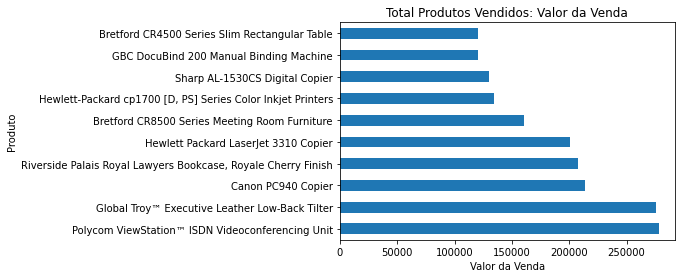

In [93]:
#Criando gráfico de barras horizontais, valor da venda
df_top_produtos.plot.barh(title="Total Produtos Vendidos: Valor da Venda")
plt.xlabel("Valor da Venda")
plt.ylabel("Produto");

In [96]:
#Criando Dataframe para operar com os 10 produtos mais vendidos por quantidade
df_top_produtos_qtde = df.groupby("Nome do Produto")["Quantidade"].sum().sort_values(ascending=False).head(10)

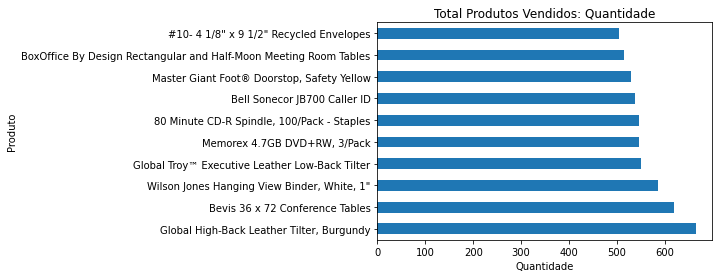

In [97]:
#Criando gráfico de barras horizontais, quantidade
df_top_produtos_qtde.plot.barh(title="Total Produtos Vendidos: Quantidade")
plt.xlabel("Quantidade")
plt.ylabel("Produto");